In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
inputdf=pd.read_csv("dataset.csv")

In [3]:
inputdf.shape

(140056, 13)

In [4]:
inputdf.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
inputdf.isna().sum()

Accident_Severity               0
Number_of_Vehicles              0
Number_of_Casualties            0
Date                            0
Day_of_Week                     0
Time                           18
Road_Type                       0
Speed_limit                     0
Light_Conditions                0
Weather_Conditions              0
Road_Surface_Conditions       284
Special_Conditions_at_Site    106
dtype: int64

In [6]:
inputdf.dropna(inplace=True)

In [7]:
inputdf.isna().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Special_Conditions_at_Site    0
dtype: int64

In [8]:
inputdf.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,Slight,1,1,1st Trimester,Monday,18H - 24H,Other,0mph - 40mph,Darkness,Fine no high winds,Dry,None
1,Slight,1,1,1st Trimester,Monday,06H - 12H,Other,0mph - 40mph,Daylight,Fine no high winds,Dry,None
2,Slight,1,1,1st Trimester,Monday,18H - 24H,Other,0mph - 40mph,Darkness,Raining no high\nwinds,Wet,None
3,Slight,1,1,1st Trimester,Tuesday,06H - 12H,Other,0mph - 40mph,Daylight,Fine no high winds,Wet,None
4,Serious,2,1,1st Trimester,Friday,06H - 12H,Other,0mph - 40mph,Daylight,Raining no high\nwinds,Wet,None


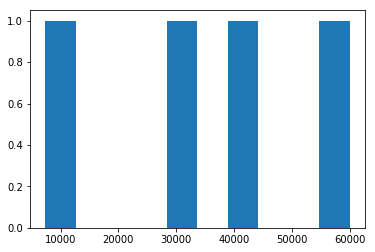

In [19]:
plt.hist(inputdf.Time.value_counts().head(100))
plt.show()

# Association Rule Mining

In [11]:
ass=pd.get_dummies(inputdf)

In [12]:
ass.head()

,Accident_Severity_Fatal,Accident_Severity_Serious,Accident_Severity_Slight,Number_of_Vehicles_1,Number_of_Vehicles_2,Number_of_Vehicles_3,Number_of_Vehicles_>=4,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,...,Weather_Conditions_Other,Weather_Conditions_Raining no high winds,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Other,Road_Surface_Conditions_Wet,Special_Conditions_at_Site_Auto signal part defective,Special_Conditions_at_Site_Auto traffic signal - out,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Other,Special_Conditions_at_Site_Road sign or marking defective or obscured
0,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [13]:
li=inputdf.values;li

array([['Slight', '1', '1', ..., 'Fine no high winds', 'Dry', 'None'],
       ['Slight', '1', '1', ..., 'Fine no high winds', 'Dry', 'None'],
       ['Slight', '1', '1', ..., 'Raining no high\nwinds', 'Wet', 'None'],
       ...,
       ['Serious', '1', '4', ..., 'Other', 'Wet', 'None'],
       ['Slight', '3', '3', ..., 'Raining no high\nwinds', 'Wet', 'None'],
       ['Slight', '>=4', '>=5', ..., 'Other', 'Other', 'None']],
      dtype=object)

In [14]:
te = TransactionEncoder()
te_ary = te.fit(li).transform(li)
print(te.columns_)

['00H - 06H', '06H - 12H', '0mph - 40mph', '1', '12H - 18H', '18H - 24H', '1st Trimester', '2', '2nd Trimester', '3', '3rd Trimester', '4', '4th Trimester', '>40mph', '>=4', '>=5', 'Auto signal part defective', 'Auto traffic signal - out', 'Darkness', 'Daylight', 'Dry', 'Dual carriageway', 'Fatal', 'Fine no high winds', 'Friday', 'Monday', 'None', 'Other', 'Raining no high\nwinds', 'Road sign or marking defective or obscured', 'Roundabout', 'Saturday', 'Serious', 'Single\ncarriageway', 'Slight', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Wet']


In [15]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,00H - 06H,06H - 12H,0mph - 40mph,1,12H - 18H,18H - 24H,1st Trimester,2,2nd Trimester,3,...,Roundabout,Saturday,Serious,Single carriageway,Slight,Sunday,Thursday,Tuesday,Wednesday,Wet
0,False,False,True,True,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,True,True,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,True,True,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,True,True,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,False,True,True,True,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [16]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

,support,itemsets,length
0,0.670401,(0mph - 40mph),1
1,0.811413,(1),1
2,0.654917,(2),1
3,0.732679,(Daylight),1
4,0.725177,(Dry),1


In [17]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(list(rules))

['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction']


In [18]:
rules1=rules[['antecedents','consequents','support','confidence','lift']]
rules1['length'] = rules1['antecedents'].apply(lambda x: len(x))
rules1['length'] = rules1['length'].astype(int)
rules1[rules1['length']>2]

C:\Users\purva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\purva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,antecedents,consequents,support,confidence,lift,length
200,"(None, 1, Fine no high winds)",(Dry),0.557936,0.859888,1.185764,3
201,"(None, Dry, Fine no high winds)",(1),0.557936,0.815848,1.005465,3
202,"(Dry, 1, Fine no high winds)",(None),0.557936,0.983247,1.005731,3
203,"(None, 1, Dry)",(Fine no high winds),0.557936,0.959062,1.177457,3
214,"(None, Other, Fine no high winds)",(1),0.506704,0.822297,1.013414,3
218,"(None, Slight, 1)",(Fine no high winds),0.546948,0.814773,1.000311,3
219,"(None, Slight, Fine no high winds)",(1),0.546948,0.812685,1.001567,3
220,"(Slight, 1, Fine no high winds)",(None),0.546948,0.980671,1.003095,3
228,"(None, Other, Slight)",(1),0.531049,0.821996,1.013043,3
234,"(Daylight, None, Fine no high winds)",(Dry),0.544543,0.891032,1.228711,3
